In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import git
import math
import os
import random
import copy
import scipy
import time
%matplotlib inline

repo = git.Repo('.', search_parent_directories=True)
BASE_DIR = repo.working_tree_dir
sys.path.append(BASE_DIR)

In [55]:
seq_id = "4"
path = os.path.join(BASE_DIR,f"data/datasets/argoverse/motion-forecasting/train/data_images/{seq_id}.png")

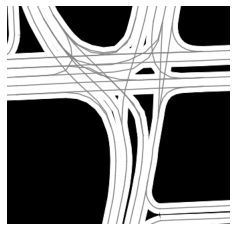

In [56]:
img = cv2.imread(path,0)

plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

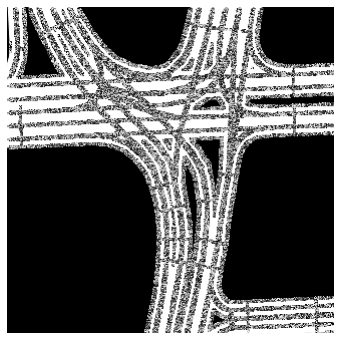

In [79]:
kernel_size = 9
sigma = 50

img_ = copy.deepcopy(img)
img_ = cv2.resize(img_, dsize=(img.shape[0],img.shape[0]))
indeces = np.where((img_ != 0) & (img_ != 255))

gap = math.floor(math.sqrt(kernel_size)/2)

fig, ax = plt.subplots(figsize=(6,6), facecolor="white")

for k in range(len(indeces[0])):
    row = indeces[0][k]
    column = indeces[1][k]

    mu = img_[row,column]
    vals = np.random.normal(mu, sigma, kernel_size).reshape(int(math.sqrt(kernel_size)),-1)

    if ((row > gap+1) and (row < img_.shape[1] - gap) 
        and (column > gap+1) and (column < img_.shape[0] - gap)):

            img_[row-gap:row+gap+1, column-gap:column+gap+1] = vals

plt.imshow(img_,cmap='gray')
plt.axis('off')

plt.savefig("test.png", bbox_inches='tight', facecolor=fig.get_facecolor(), 
                edgecolor='none', pad_inches=0)

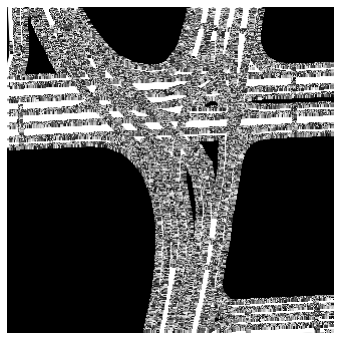

In [75]:
kernel_size = 9
sigma = 10

img_2 = copy.deepcopy(img_)
indeces = np.where((img_2 != 0) & (img_2 != 255))

gap = math.floor(math.sqrt(kernel_size)/2)

fig, ax = plt.subplots(figsize=(6,6), facecolor="white")

for k in range(len(indeces[0])):
    row = indeces[0][k]
    column = indeces[1][k]

    mu = img_[row,column]
    vals = np.random.normal(mu, sigma, kernel_size).reshape(int(math.sqrt(kernel_size)),-1)

    if ((row > gap+1) and (row < img_.shape[1] - gap) 
        and (column > gap+1) and (column < img_.shape[0] - gap)):

            img_2[row-gap:row+gap+1, column-gap:column+gap+1] = vals

plt.imshow(img_2,cmap='gray')
plt.axis('off')

plt.savefig("test2.png", bbox_inches='tight', facecolor=fig.get_facecolor(), 
                edgecolor='none', pad_inches=0)

/tmp/ipykernel_17967/1945345092.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


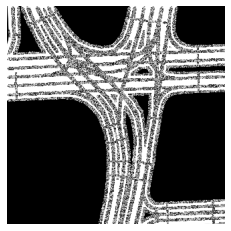

In [76]:
from scipy.ndimage.filters import gaussian_filter

blurred = gaussian_filter(img_, sigma=0.1)
# blurred = gaussian_filter(img_2, sigma=0.1)

plt.imshow(blurred,cmap='gray')
plt.axis('off')

plt.savefig("blurred.png", bbox_inches='tight', facecolor=fig.get_facecolor(), 
                edgecolor='none', pad_inches=0)